# importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# reading data

In [ ]:
data=pd.read_csv("/content/sales_data.csv")
data.head()

,OrderID,Revenue,Discounts,Taxes,ProductID,ProductName,Category,Price,CustomerID,Name,Region,Segment,OrderDate,Quantity,TotalAmount
0,1000,1755,30,65,212,Mind,Accessories,67,6,Lauren Walls,West,Wholesale,2023-02-11,4,426
1,1001,1727,76,101,226,Suffer,Accessories,179,22,Lori Cole,Central,Wholesale,2024-06-09,8,184
2,1002,1834,25,23,231,Role,Home Appliances,82,31,Sherri Knox,South,Wholesale,2022-12-11,5,880
3,1003,896,94,123,227,North,Home Appliances,221,23,Randy Duke,North,Retail,2022-12-18,10,928
4,1004,1868,51,63,215,Both,Accessories,334,42,Zachary Ray,Central,Corporate,2024-04-11,7,517


# Making plots

## 1. Bar Plot

Use Case: Effective for comparing categories, such as average Revenue across different Category values.

Seaborn:


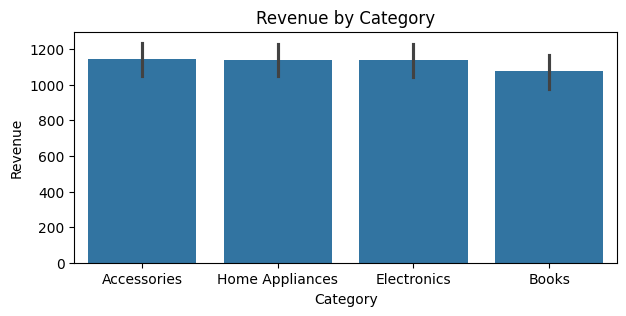

In [ ]:
# Seaborn bar plot
plt.figure(figsize=(7, 3))
sns.barplot(x='Category', y='Revenue', data=data)
plt.title('Revenue by Category')
plt.show()


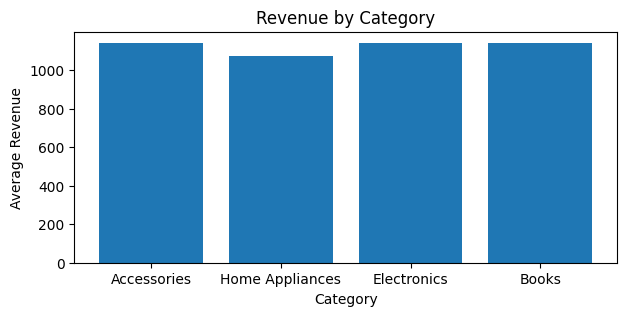

In [ ]:
# Matplotlib bar plot
categories = data['Category'].unique()
revenue = data.groupby('Category')['Revenue'].mean()
plt.figure(figsize=(7, 3))
plt.bar(categories, revenue)
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue')
plt.show()


## 2. Scatter Plot

Use Case: Useful for visualizing relationships between two continuous variables, such as Quantity and Revenue.

Seaborn:



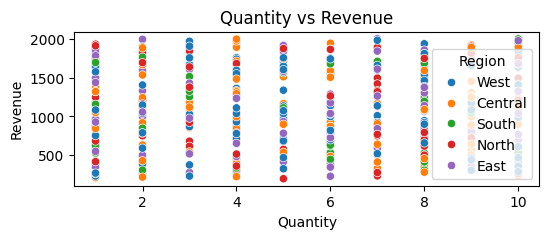

In [ ]:
# seborn scatter plot
plt.figure(figsize=(6, 2))
sns.scatterplot(x='Quantity', y='Revenue', hue='Region', data=data)
plt.title('Quantity vs Revenue')
plt.show()

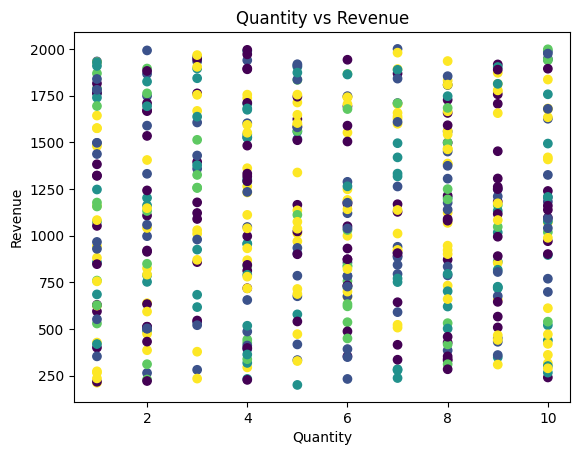

In [ ]:
# Matplotlib scatter plot
plt.figure(figsize=(6, 2))
plt.scatter(data['Quantity'], data['Revenue'], c=data['Region'].astype('category').cat.codes)
plt.title('Quantity vs Revenue')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()


## 3. Histogram

Use Case: Great for understanding the distribution of a continuous variable, like the frequency of different Revenue values.

Seaborn:

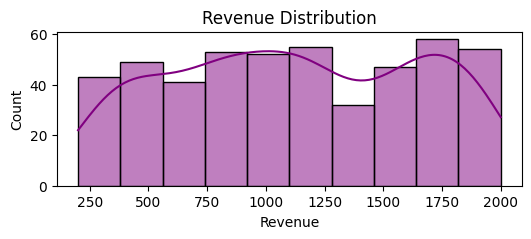

In [ ]:
plt.figure(figsize=(6, 2))
sns.histplot(data['Revenue'], kde=True, color='purple')
plt.title('Revenue Distribution')
plt.show()

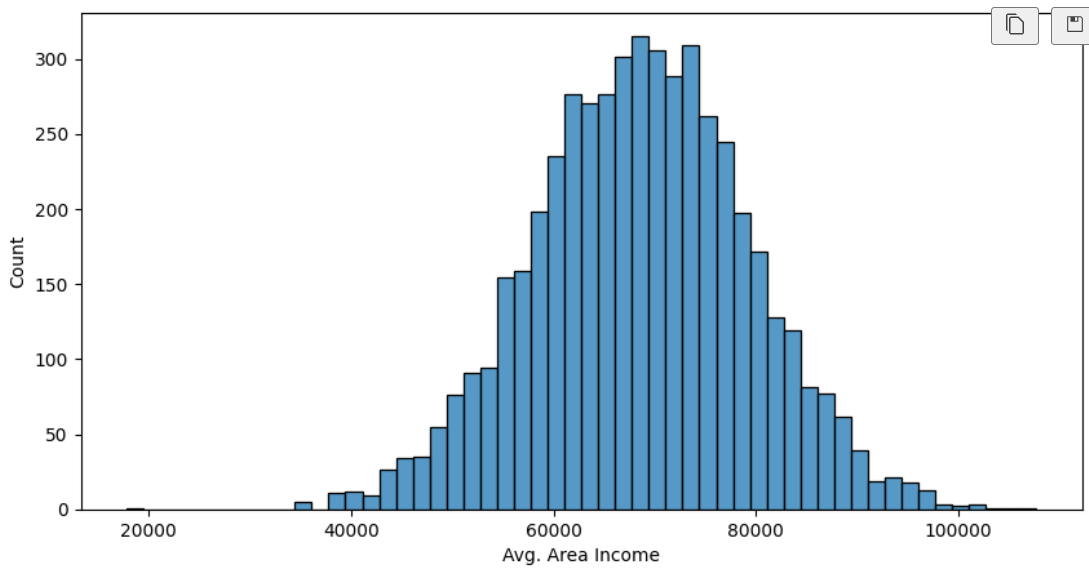

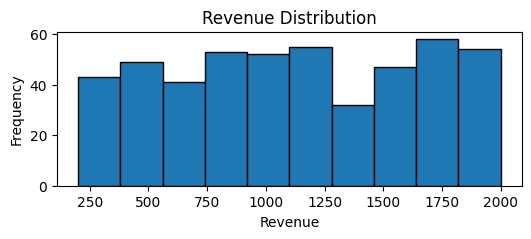

In [ ]:
# Matplotlib histogram
plt.figure(figsize=(6, 2))
plt.hist(data['Revenue'],edgecolor='k')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


## 4. Box Plot

Use Case: Helps in visualizing the distribution and outliers of a continuous variable across categories, such as Revenue by Region.

Seaborn:

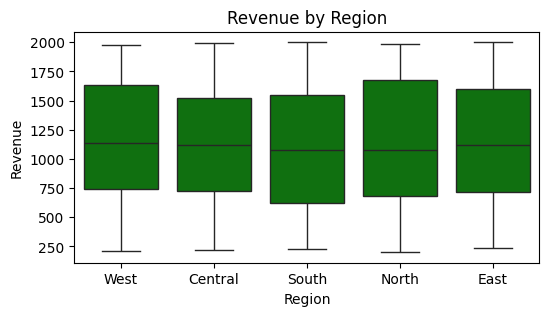

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='Region', y='Revenue', data=data , color="green")
plt.title('Revenue by Region')
plt.show()

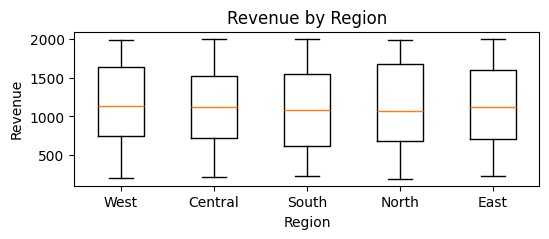

In [ ]:
# Matplotlib boxplot
plt.figure(figsize=(6, 2))
regions = data['Region'].unique()
revenue_by_region = [data[data['Region'] == region]['Revenue'] for region in regions]
plt.boxplot(revenue_by_region, tick_labels=regions)
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()


In [ ]:
data1=pd.read_csv("/content/revenue_by_month.csv")

## 5. Line Plot

Use Case: Ideal for showing trends over time, like how Revenue changes across different OrderDate.

Seaborn:

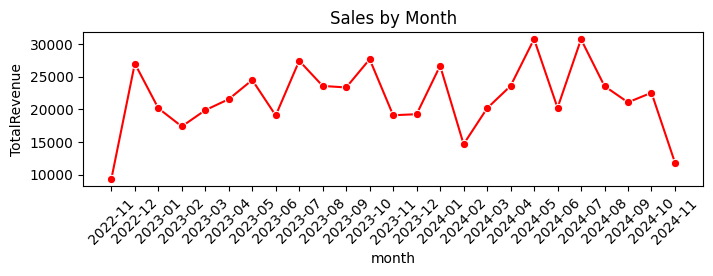

In [ ]:
plt.figure(figsize=(8, 2))
sns.lineplot(x="month", y="TotalRevenue", data=data1, marker="o", color="red")
plt.title("Sales by Month")
plt.xticks(rotation=45)
plt.show()

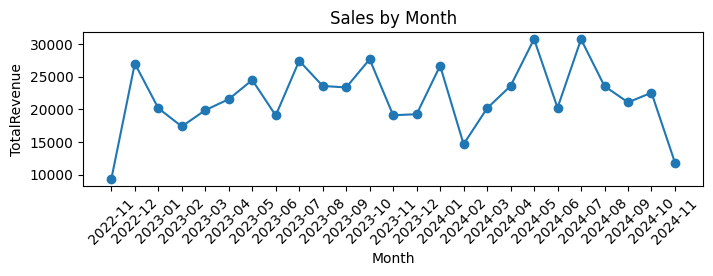

In [ ]:
#matplotlib line plot
plt.figure(figsize=(8, 2))
plt.plot(data1['month'], data1['TotalRevenue'], marker='o')
plt.title("Sales by Month")
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('TotalRevenue')
plt.show()

## 6. Count Plot (Seaborn) / Pie Chart (Matplotlib)

Count Plot:

Use Case: Used to count and display the frequency of categorical variables, such as the number of orders in each Category.

Seaborn:

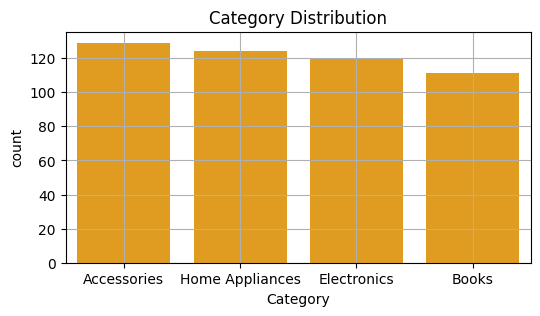

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Category', data=data, color="orange")
plt.title('Category Distribution')
plt.grid()
plt.show()

## matplotlib pi chart

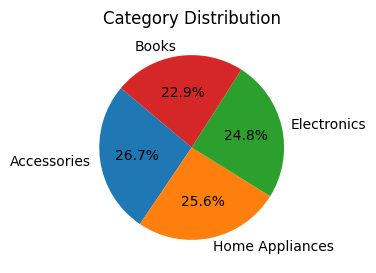

In [ ]:
plt.figure(figsize=(7, 3))
category_counts = data['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.show()

## 7. Heatmap (Seaborn) / Stacked Bar Plot (Matplotlib)

Seaborn Heatmap:

Use Case: Effective for displaying relationships and variations between two categorical variables, such as average Revenue by Region and Category.

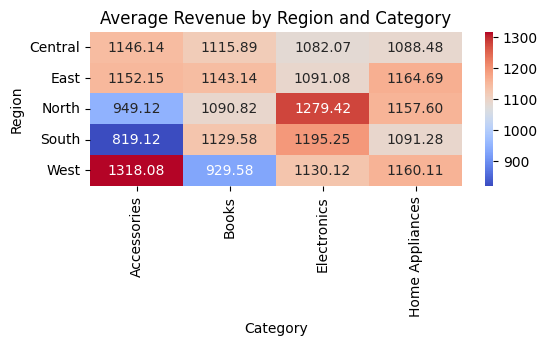

In [ ]:
plt.figure(figsize=(6, 2))
# Pivot the data to create a matrix format for the heatmap
pivot_table = data.pivot_table(values='Revenue', index='Region', columns='Category', aggfunc='mean')
# Seaborn heatmap
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Revenue by Region and Category')
plt.show()



## Matplotlib Stacked Bar Plot:

Use Case: Useful for showing the cumulative value distribution across different categories, like total Revenue for each Region divided by Category.

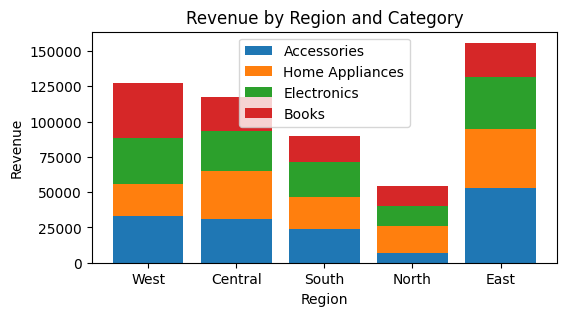

In [ ]:
plt.figure(figsize=(6, 3))
categories = data['Category'].unique()
regions = data['Region'].unique()
stacked_data = []
for category in categories:
    stacked_data.append(data[data['Category'] == category].groupby('Region')['Revenue'].sum())
# Matplotlib stacked bar plot
plt.bar(regions, stacked_data[0], label=categories[0])
for i in range(1, len(categories)):
    plt.bar(regions, stacked_data[i], bottom=sum(stacked_data[:i]), label=categories[i])
plt.title('Revenue by Region and Category')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.legend()
plt.show()
